# [practice] Microsoft ML course challenge 03
## Wine Classification Challenge - Classification Model (non-binary classifier)

explore the data and train a classification model that achieves an overall Recall metric of over 0.95 (95%)  
https://github.com/MicrosoftDocs/ml-basics/blob/master/challenges/03%20-%20Wine%20Classification%20Solution.ipynb

Use nbviewer: https://nbviewer.org/

### Explore the data
Here we have 12 numeric features and a classification labeled data **WineVariety**

In [1]:
import pandas as pd

# load the training dataset from github need to add ?raw=true after URL

URL = 'https://github.com/MicrosoftDocs/ml-basics/blob/master/challenges/data/wine.csv?raw=true'
wine = pd.read_csv(URL)
wine.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

In [2]:
wine.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Text(0.5, 1.0, 'Correlation Heatmap')

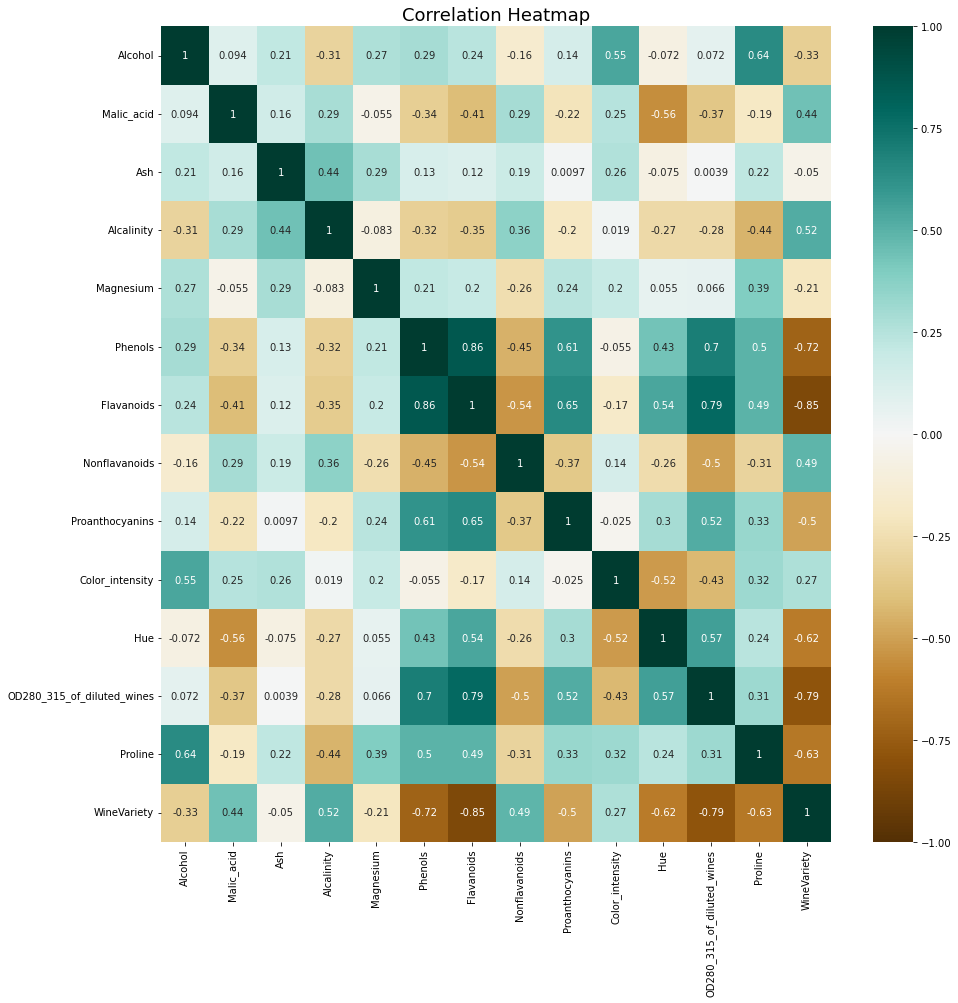

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(15, 15))

# Here we just take a look at the Correlation between each column.
heatmap = sns.heatmap(wine.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':18})

Text(0.5, 1.0, 'Correlation Heatmap with WineVariety group (0, 1, 2)')

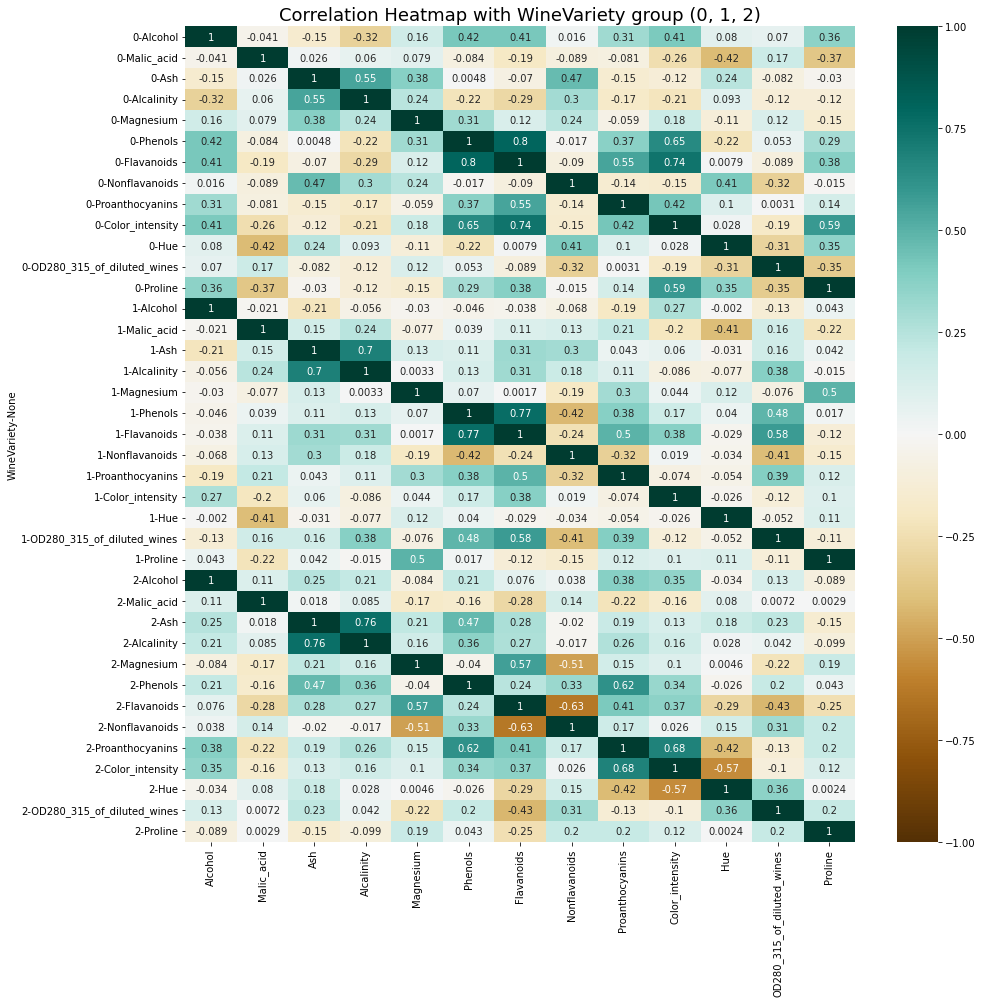

In [4]:
plt.figure(figsize=(15, 15))

# Show correlation within 3 different WineVariety group.

heatmap = sns.heatmap(wine.groupby(['WineVariety']).corr(), vmin= -1, vmax= 1, annot= True, cmap= 'BrBG')
heatmap.set_title('Correlation Heatmap with WineVariety group (0, 1, 2)', fontdict = {'fontsize':18})

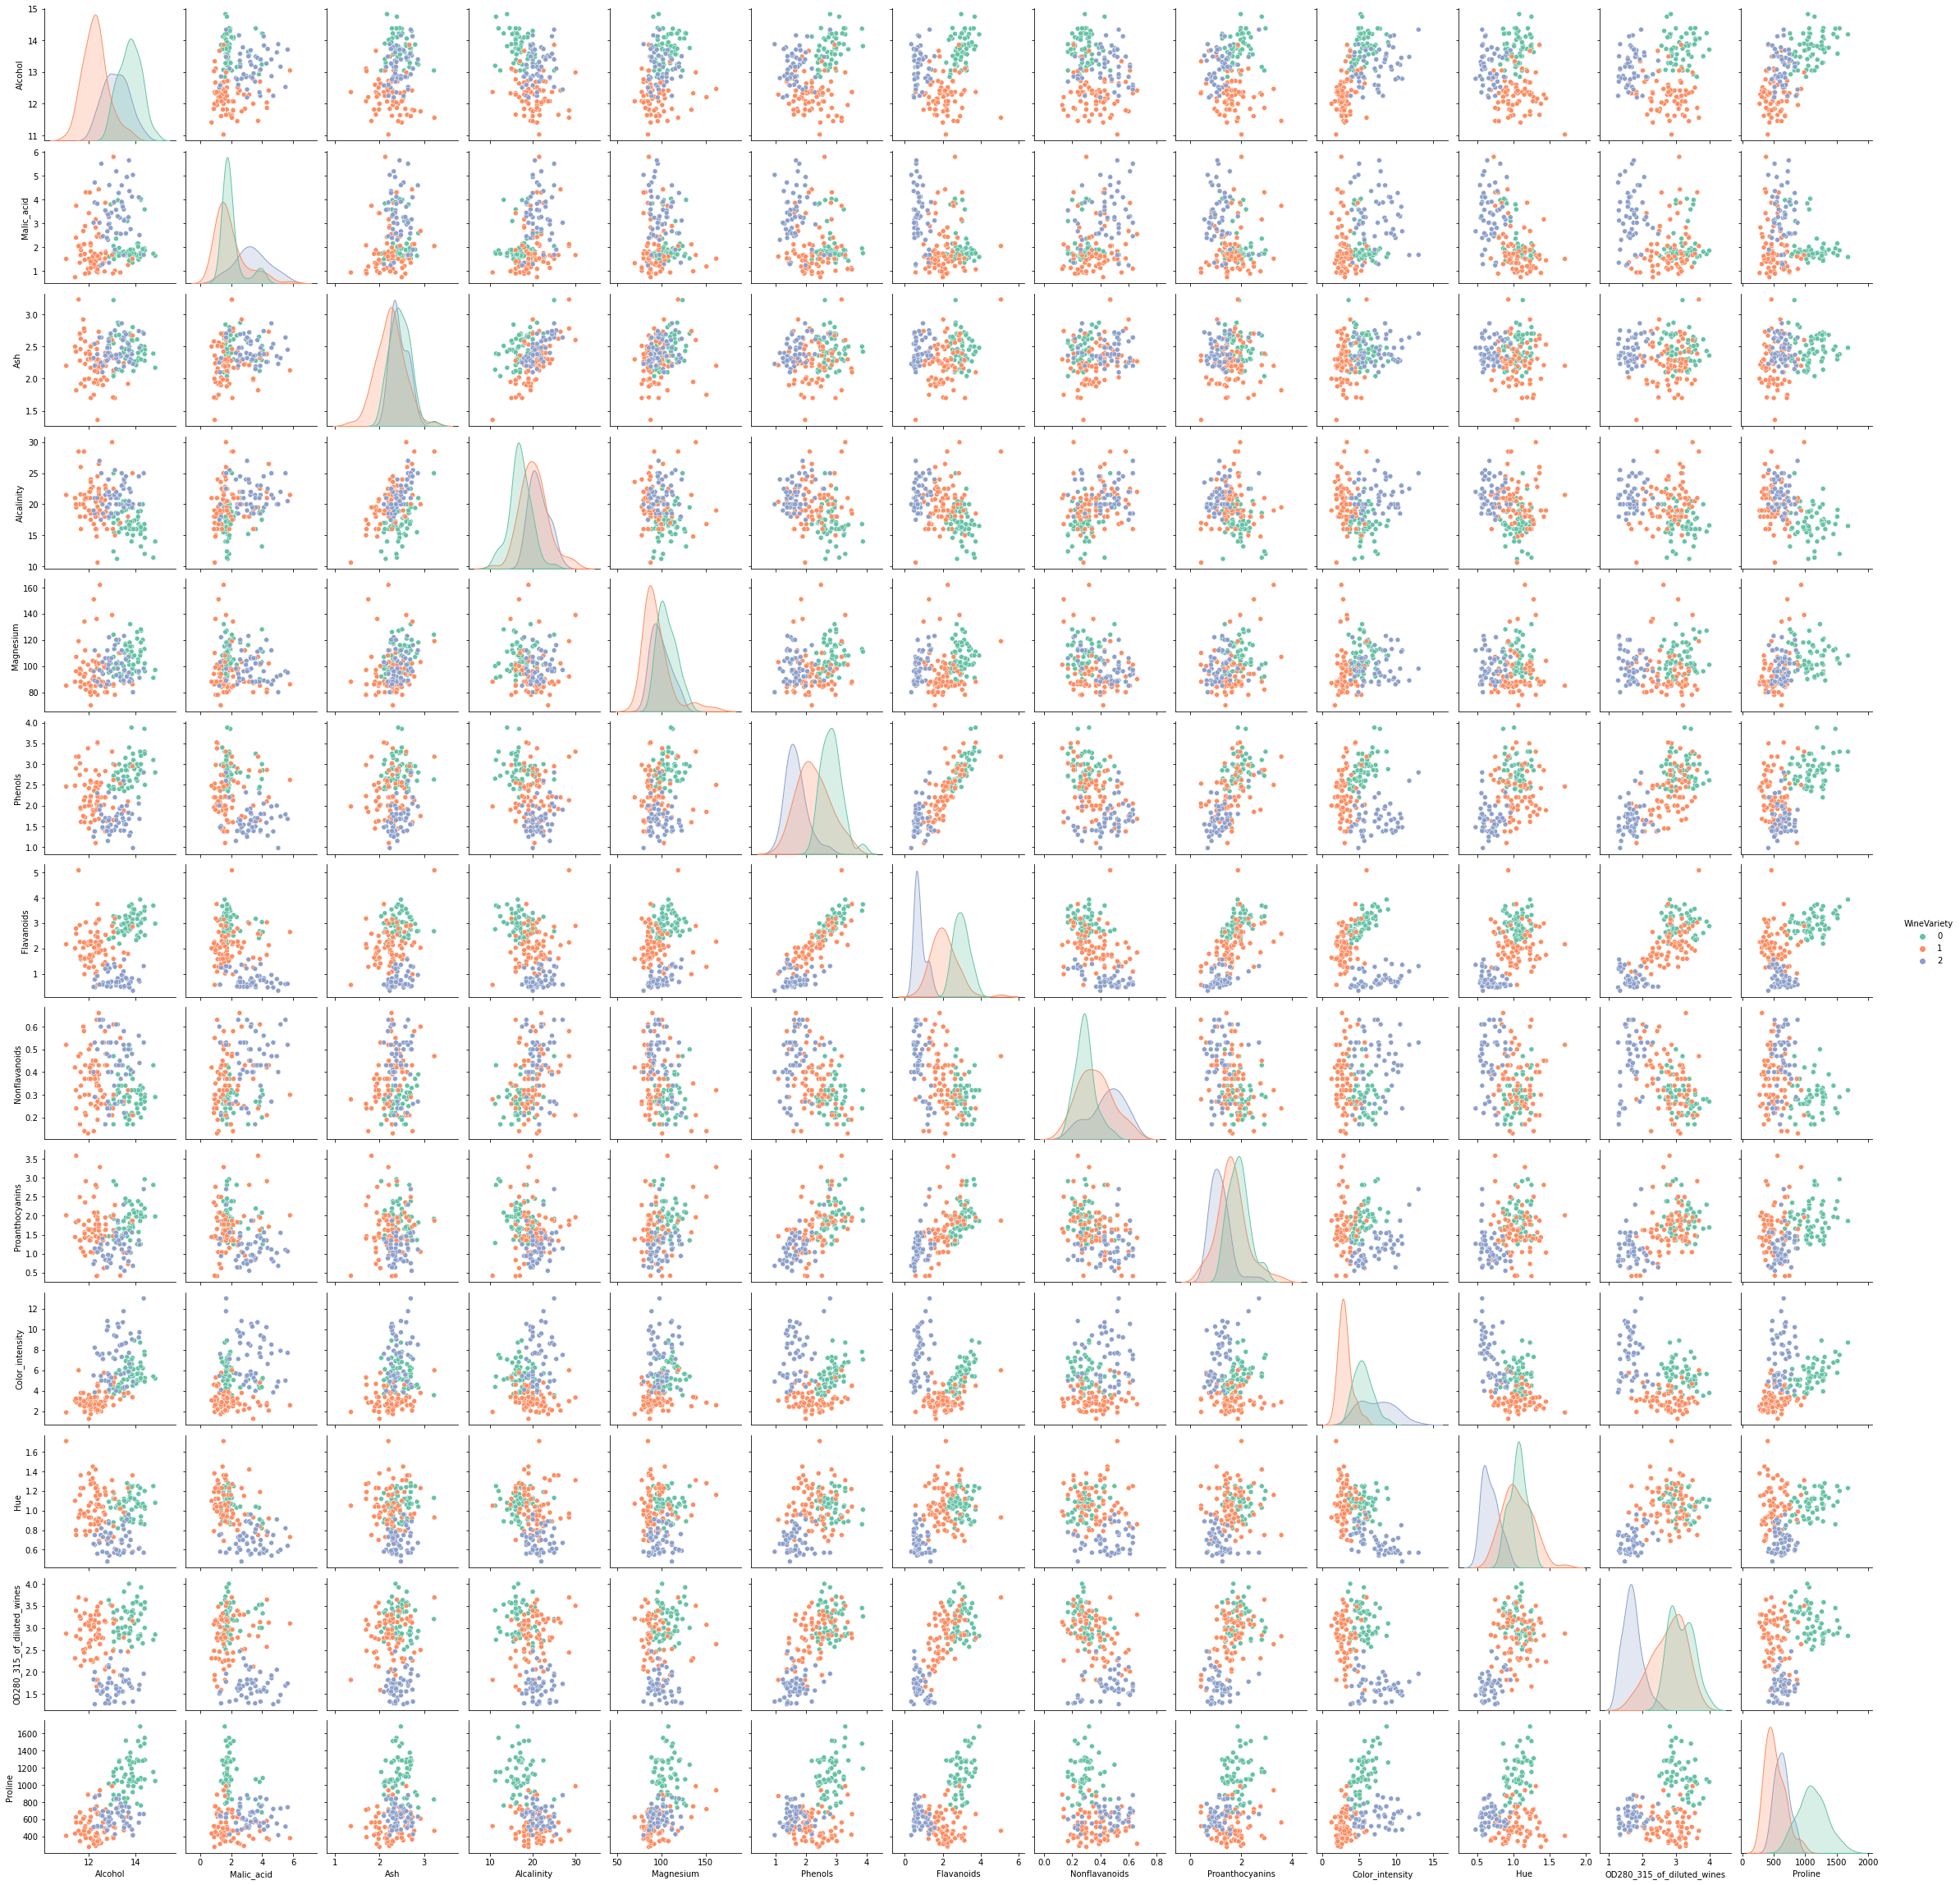

In [5]:
# By default, this function will create a grid of Axes 
# such that each numeric variable in data will by shared across the y-axes across a single row 
# and the x-axes across a single column. The diagonal plots are treated differently: 
# a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

sns.pairplot(wine, hue = 'WineVariety',  palette="Set2")

## Classification
### Separate features and label
1. Features - predictor variables / independent variables
2. Target variable = dependent variable / response avariable, here we have a categorical target variable
   **WineVariety** 
   - 0 (variety A)
   - 1 (variety B)
   - 2 (variety C)

### k-Nearest Neighbors:  basic concept
Format required by the scikit-learn API.

In [6]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
# Create arrays X and y for the features and the target variable.

y = wine['WineVariety'].values  # Target 
X = wine.drop( 'WineVariety', axis = 1).values   # Features

# Create a k-NN classifier with 10 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 10)

# Fit the classifier to the data
knn.fit(X, y)

# Print the accuracy
print("knn.score:", knn.score(X, y))

# Predict the labels for the training data X: y_pred
# y_pred = knn.predict(X)

# let's play with new data points
X_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)

print("Prediction: {}".format(new_prediction))

knn.score: 0.7921348314606742
Prediction: [0 1]


### Split the data for training and validation - [ this time set the random_state = 0]

In [7]:
#  first split our data into training and testing sets
from sklearn.model_selection import train_test_split

y = wine['WineVariety'].values  # Target 
X = wine.drop(['WineVariety'], axis = 1).values  # Features

# # Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 124
Test cases: 54


### Normalization using sklearn -   
need to import the MinMaxScalar from the sklearn library and apply it to the dataset

https://scikit-learn.org/stable/modules/preprocessing.html

In [8]:
# need to import the MinMaxScalar from the sklearn library and apply it to the dataset
from sklearn.preprocessing import StandardScaler

# fit scaler on training data
scaler = StandardScaler().fit(X_train)
# transform training data
X_train_norm = scaler.fit_transform(X_train)

# Check our data
print(X_train_norm.std(axis=0))

# transform testing dataabs
X_test_norm = scaler.transform(X_test)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
# Create a k-NN classifier with N neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 9)

# Fit the classifier to the training data
knn.fit(X_train_norm, y_train)

# Print the accuracy
print("Accuracy with scaling: ", knn.score(X_test_norm, y_test))

Accuracy with scaling:  1.0


### Overfitting and underfitting

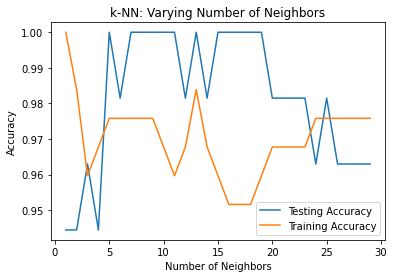

In [10]:
# Setup arrays to store train and test accuracies

neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k

for i, k in enumerate(neighbors): # The enumerate() method adds a counter to an iterable and returns it (the enumerate object).
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train_norm, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_norm, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test_norm, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


### Hyperparameter tuning

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X_train_norm, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 18}
0.976


Overall Accuracy [ tp+tn)/(tp+fp+fn+tn ]: 0.9814814814814815
Overall Precision [tp/(tp+fp)] : 0.9833333333333334
Overall Recall [ tp/(tp+fn) ]: 0.9848484848484849
classification_report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        22
           2       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Prediction: [0 1]


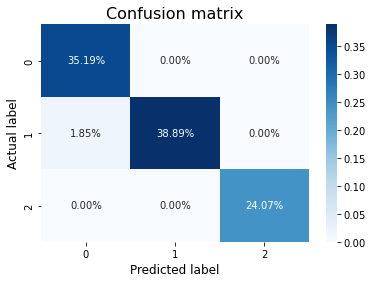

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 14)

knn.fit(X_train_norm, y_train)
y_predict = knn.predict(X_test_norm)

# Get metrics
print("Overall Accuracy [ tp+tn)/(tp+fp+fn+tn ]:",accuracy_score(y_test, y_predict))
print("Overall Precision [tp/(tp+fp)] :",precision_score(y_test, y_predict, average='macro'))
print("Overall Recall [ tp/(tp+fn) ]:",recall_score(y_test, y_predict, average='macro'))

cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.title('Confusion matrix', fontsize=16)

print("classification_report:\n",classification_report(y_test,y_predict))


# let's play with new data points again
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

# Predict and print the label for the new data point X_new
X_new_scaler = scaler.transform(X_new)
new_prediction = knn.predict(X_new_scaler)

print("Prediction: {}".format(new_prediction))

### Metrics from the confusion matrix 
-  Precision:   
which is the number of true positives divided by the total number of true positives and false positives.  
It is also called the positive predictive value or PPV.   
-  Recall:  
which is the number of true positives divided by the total number of true positives and false negatives.   
This is also called sensitivity, hit rate, or true positive rate.   

## Logistic Regression 
https://scikit-learn.org/stable/modules/preprocessing.html

In [13]:
y = wine['WineVariety'].values  # Target 
X = wine.drop(['WineVariety'], axis = 1).values  # Features

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
print("Training Sample:", len(X_train))
print("Testing Sample:", len(y_test))

# # For multiclass problems, only ‘newton-cg’ and ‘lbfgs’ handle, multi_class: ovr
pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', multi_class='multinomial'))

# fit the pipeline to train a linear regression model on the training set
Model_1 = pipe.fit(X_train, y_train)
print(Model_1)

pipe.score(X_test, y_test) 

Training Sample: 124
Testing Sample: 54
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(multi_class='multinomial'))])


1.0

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3,4,5,6]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])


# fit the pipeline to train a linear regression model on the training set
Model_2 = pipeline.fit(X_train, y_train)
print(Model_2)
pipeline.score(X_test, y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('regressor', LogisticRegression())])


0.9814814814814815

In [15]:
predictions = Model_1.predict(X_test)
print(predictions)
predictions_2 = Model_2.predict(X_test)
print(predictions_2)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2]
[0 2 1 0 1 1 0 1 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2]


In [16]:
# Get metrics
print("Overall Accuracy Model_1:",accuracy_score(y_test, predictions))
print("Overall Precision Model_1:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall Model_1:",recall_score(y_test, predictions, average='macro'))

Overall Accuracy Model_1: 1.0
Overall Precision Model_1: 1.0
Overall Recall Model_1: 1.0


In [17]:
# Get metrics
print("Overall Accuracy Model_2:",accuracy_score(y_test, predictions_2))
print("Overall Precision Model_2:",precision_score(y_test, predictions_2, average='macro'))
print("Overall Recall Model_2:",recall_score(y_test, predictions_2, average='macro'))

Overall Accuracy Model_2: 0.9814814814814815
Overall Precision Model_2: 0.9855072463768115
Overall Recall Model_2: 0.9743589743589745


How **Micro Average** vs **Macro average** Performance in a Multiclass classification setting.  
https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

### ROC curve

In [18]:
from sklearn.metrics import roc_curve
Model_1_prob = Model_1.predict_proba(X_test)
print(Model_1_prob.shape)

Model_2_prob = Model_2.predict_proba(X_test)
print(Model_2_prob.shape)

(54, 3)
(54, 3)


Text(0.5, 1.0, 'Model_1 ROC Curve of Variety A')

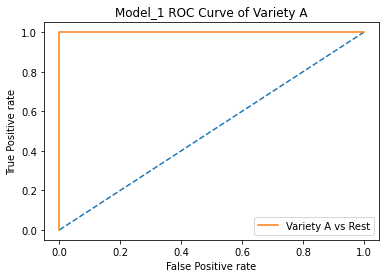

In [19]:
fpr_0, tpr_0, thresholds_0 = roc_curve(y_test, Model_1_prob[:,0], pos_label= 0)

plt.plot([0,1],[0,1],'--')
plt.plot(fpr_0,tpr_0, label = "Variety A vs Rest")
plt.legend(loc='best')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Model_1 ROC Curve of Variety A')

Text(0.5, 1.0, 'Model_2 ROC Curve of Variety B')

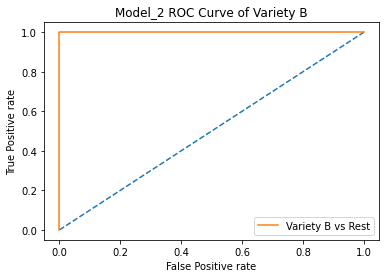

In [20]:
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, Model_2_prob[:,1], pos_label= 1)

plt.plot([0,1],[0,1],'--')
plt.plot(fpr_0, tpr_0, label = "Variety B vs Rest")
plt.legend(loc='best')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Model_2 ROC Curve of Variety B')

<AxesSubplot:>

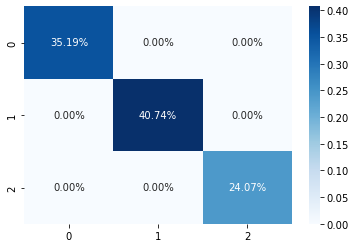

In [21]:
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [22]:
# Get predictions for two new wine samples
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

# Call the web service, passing the input data
x_new_pred = Model_2.predict(x_new)

classes = ['Variety A','Variety B','Variety C']
# Get the predicted classes.
for prediction in x_new_pred:
    print(prediction, '(' + classes[prediction] +')')

0 (Variety A)
1 (Variety B)


## Extra: Hold-out set in practice

LogisticRegression Parameters:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- 1. Penalty {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
- 2. C : float, default=1.0  
     Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values  specify stronger regularization.  
     **A large C can lead to an overfit model, while a small C can lead to an underfit model.**
     
#### Here I have the Convergence Warning: lbfgs failed to converge!!!!?
https://clay-atlas.com/us/blog/2021/10/30/python-scikit-learn-convergence-warning/

In [23]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {"C": c_space, "penalty": ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
# Here I have the Convergence Warning: lbfgs failed to converge!!!!?
# https://clay-atlas.com/us/blog/2021/10/30/python-scikit-learn-convergence-warning/
logreg = LogisticRegression(solver = 'liblinear')

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9673333333333334
